# Поиск мотива

## 4. Поиск мотива для каждого кластера с адаптивным расстоянием

### 4.1 Перебор возможных расстояний, оценка по Dunn-индексу. Запуск без кластеризации

В качестве диаметра кластера и расстояния между кластерами используется **среднее** попарное расстояние между членами кластера.  
[Результаты прогона](https://github.com/latur/SWaveform/blob/main/supplement/KMS_adaptive_threshold.ipynb) для HGDP.  
**Максимальный индекс кластеризации не даёт оптимального мотива**

```bash
# Запуск
for src in ./data/HGDP/bin0427/*.bin; do
  for i in {1..24}; do # 24 незавыисимых запусков по 3 повтора
    python3 ./tools/KMS_adaptive_threshold.py src:$src dataset:800 seed:900$i repeats:3 &
  done
  wait
done
```

### 4.1 Выбор адаптивного расстояния по распределению расстояний. Квантили `[0.025, 0.050, 0.100]`

```bash
# Запуск
for src in ./bin0427/*.bin; do
  for i in {1..24}; do
    python3 KMS_adaptive_threshold.py src:$bin dataset:10 seed:1337 repeats:2 &
  done
  wait
done

# Объединение: выравнивание кластеров и мотивов
for code in CNV_gain_L CNV_gain_R CNV_loss_L CNV_loss_R DUP_L DUP_R DEL_L DEL_R INV_L INV_R INS_C; do
  python3 Clusters_ADAKMS_align.py ./bin0427 $code & 
done
```

In [1]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) { return false; }

<IPython.core.display.Javascript object>


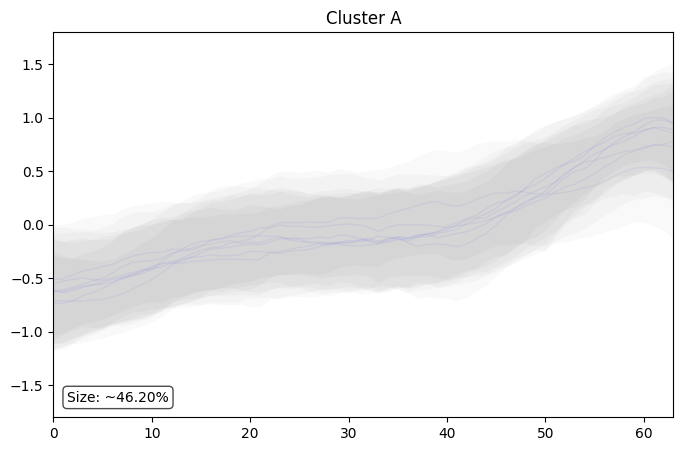
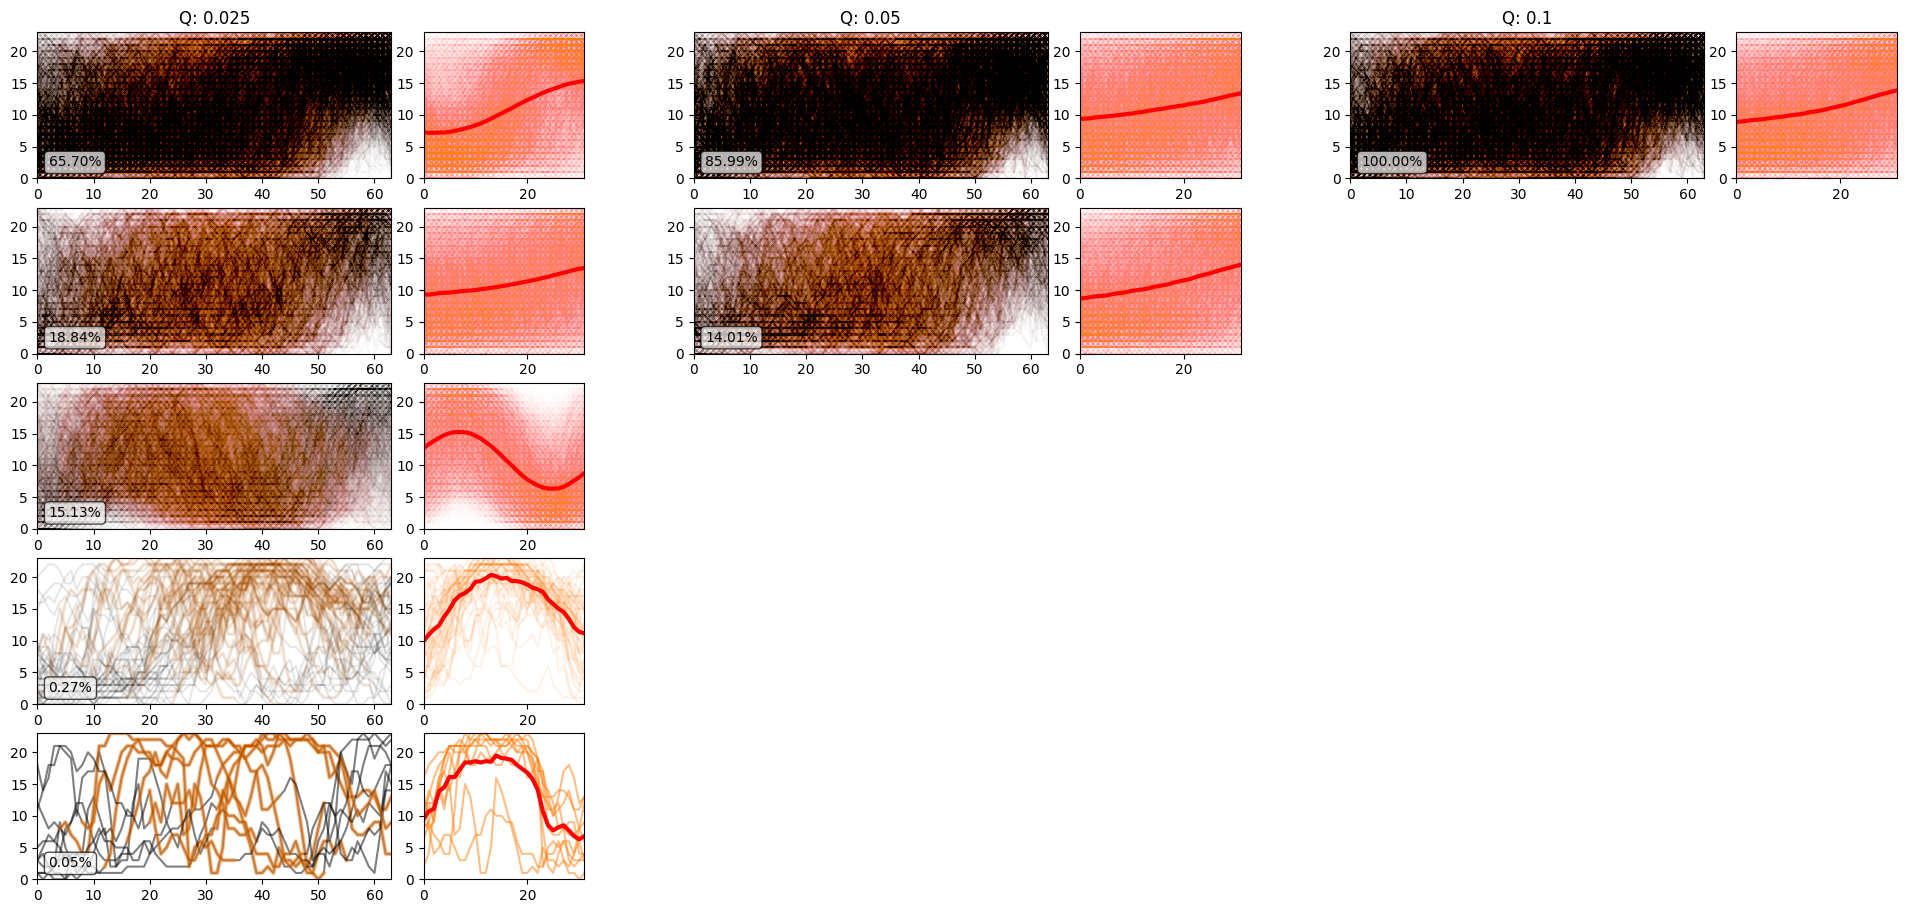


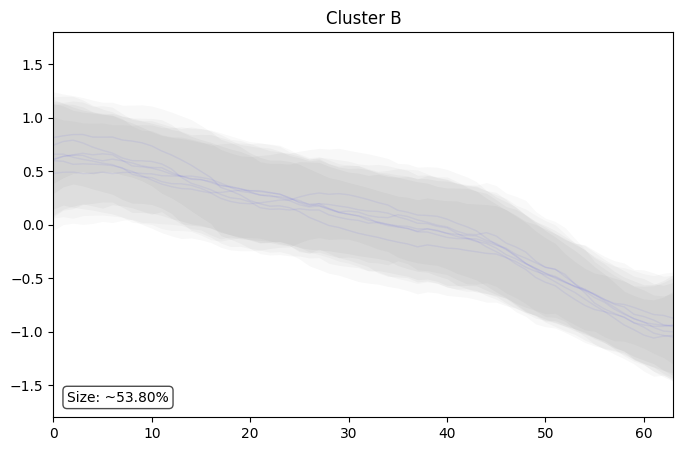
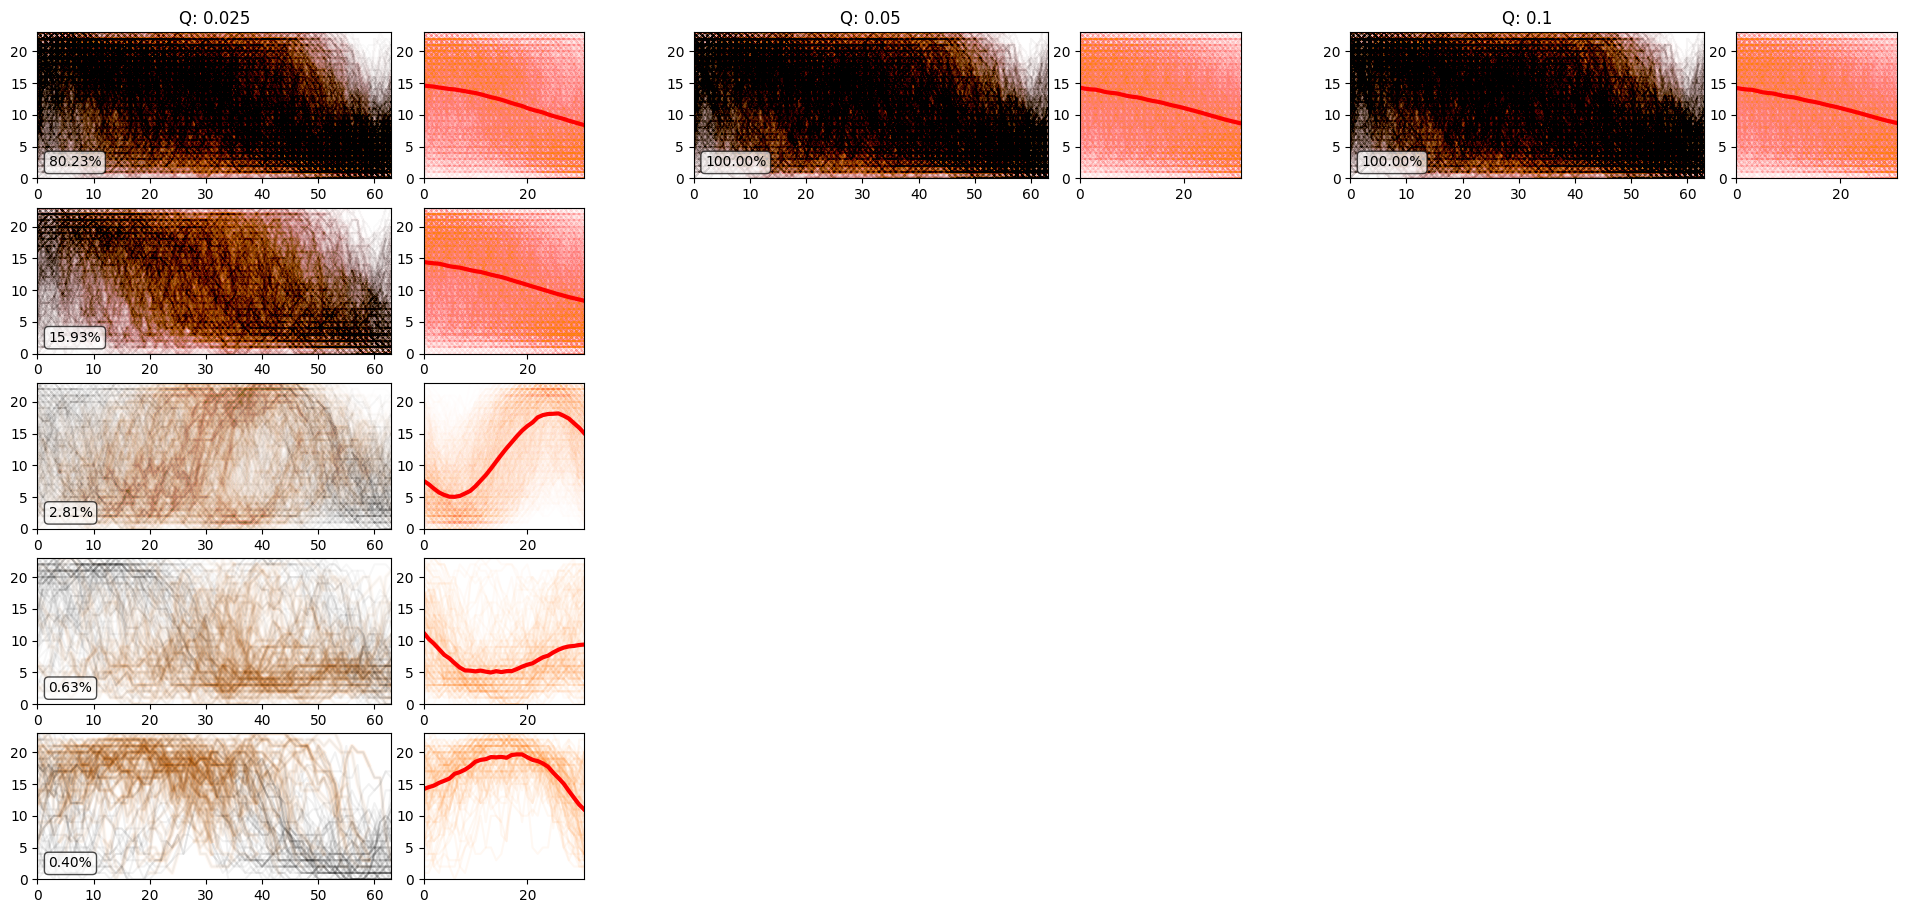

In [8]:
import glob, re, json
from IPython.display import Markdown as md
from IPython.display import HTML

display(HTML('<style>.cluster_detail { width: 280px;  }</style>'))

for src in sorted(glob.glob("../data/adakms/detail*")):
    name, cls = re.search("detail_([A-Za-z_]+)\.([A|B]).", src).groups()[0:2]
    with open(src) as f:
        p = json.load(f)
        src = ['cluster_detail', 'motif_detail']
        images = [(f'<img class="{s}" src="data:image/png;base64,{p[s]}" /> ') for s in src]
        display(HTML(f'<h3 style="display:flex;">{name}, {cls}</h3>')) 
        display(HTML(f'{" ".join(images)}'))  


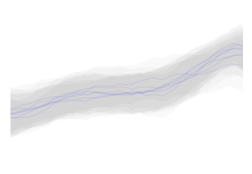
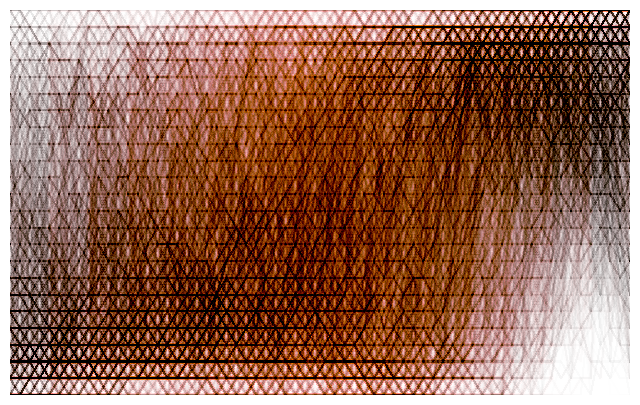
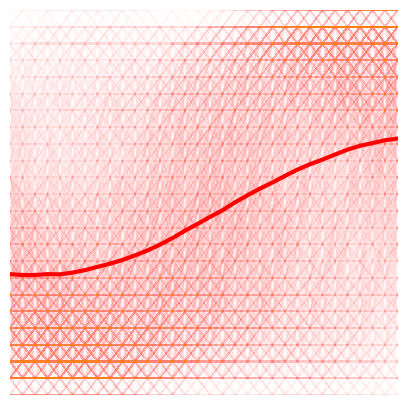


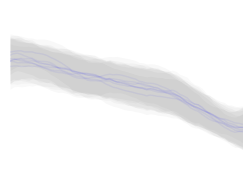
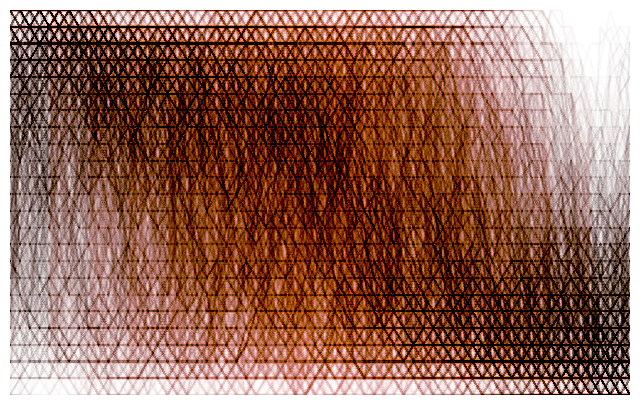
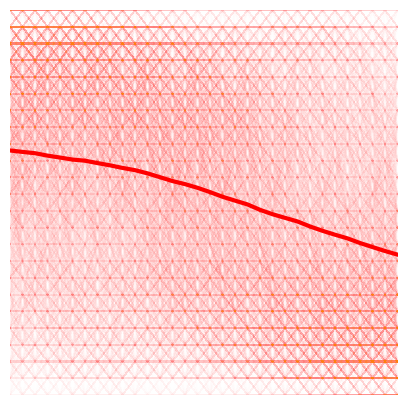

In [9]:
display(HTML('''<style>
  .p-img { width: 80px; height: 40px !important; margin: 0 10px 0 0 !important; border:1px solid #333; }
  .p-img.motif { width: 40px; }
  .p-line { display:flex; align-items: center }
  .p-line span { width: 130px; }
  .p-code { font-size: 18px; font-weight: bold; color: #444; }
</style>'''))

for src in sorted(glob.glob("../data/adakms/detail*")):
    name, cls = re.search("detail_([A-Za-z_]+)\.([A|B]).", src).groups()[0:2]
    with open(src) as f:
        p = json.load(f)
        src = ['cluster', 'motif_signal', 'motif']
        images = [(f'<img class="p-img {s}" src="data:image/png;base64,{p[s]}" /> ') for s in src]
        noets = f"<span class='p-code'>{p['code']}</span><span>Cluster: {cls}<br>{p['part']}</span>"
        display(HTML(f'<div class="p-line">{" ".join(images)}{noets}</div>'))  

In [15]:
11 * 383 / 60 

70.21666666666667